# Vector Dot Products

This tutorial is intended to explain properties of vector dot products.

The dot product of two vecotrs is related to the angle betweeen the
vectors.  When the vectors are orthogonal, the dot product is equal to
zero.  The following code will demonstrate this,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import seaborn
seaborn.set()
colors = seaborn.color_palette()
import utils

In [5]:
# For 3D plotting we need to import some extra stuff
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# First create two random vectors in 3 dimensional space
v1 = rand(3, 1)
v2 = rand(3, 1)

# And scale them to unit length
v1 = v1 / norm(v1)
v2 = v2 / norm(v2) 

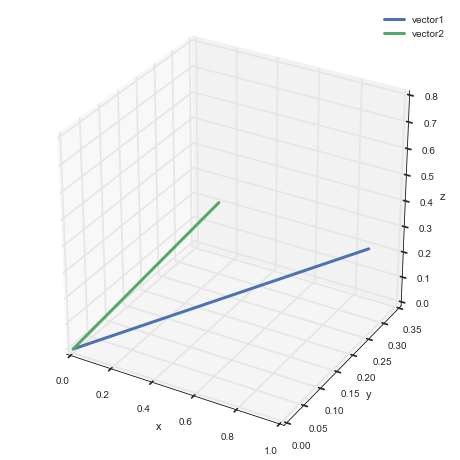

In [8]:
# Plot the vectors
o = zeros(3) # origin

# We'll use the object oriented plotting interface
f = figure(figsize=(8, 8))
ax = f.add_subplot(111, projection="3d", axisbg="white")
ax.plot(*[[o[i], v1[i]] for i in range(3)], linewidth=3, label="vector1")
ax.plot(*[[o[i], v2[i]] for i in range(3)], linewidth=3, label="vector2")
for axisl in ["x", "y", "z"]:
    getattr(ax, "set_%slabel" % axisl)(axisl)  # Here's a fun trick
legend();

The vectors define a subspace.  The subspace defined by these vectors is
all the points that can be obtained from weighted sums of the two
vectors.  In this case the subspace will be the plane containing the two
vectors.  Lets visualize this by adding a bunch of points to our graph
that are obtained from linear combinations (weighted sums) of our two
vectors.  If we think of the two vectors as regressors that we are
putting into a linear model then the subspace defined by the vectors
represents all the possible linear models.

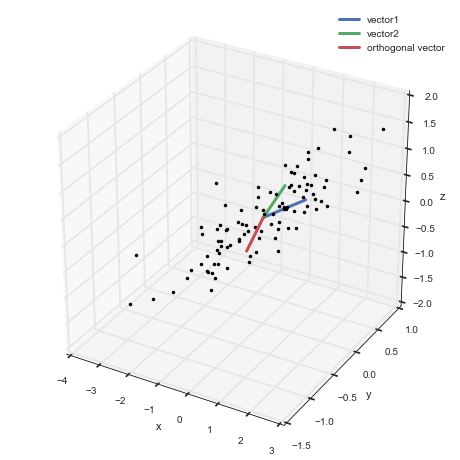

In [9]:
f = figure(figsize=(8, 8))
ax = f.add_subplot(111, projection="3d", axisbg="white")
ax.plot(*[[o[i], v1[i]] for i in range(3)], linewidth=3, label="vector1")
ax.plot(*[[o[i], v2[i]] for i in range(3)], linewidth=3, label="vector2")
for axisl in ["x", "y", "z"]:
    getattr(ax, "set_%slabel" % axisl)(axisl)  # Here's a fun trick
legend()

for i in range(100):
    # generate a point that is a weighted sum of the 2 vectors
    w1 = randn(1)
    w2 = randn(1)
    point = w1 * v1 + w2 * v2
    ax.plot(*point, marker=".", color="k")

# We can find a vector that is orthogonal to the plane defined by v1 and v2
# by taking the vector cross product.  See the wikipedia page for a
# definition of cross product
v3 = cross(v1.reshape(1, 3), v2.reshape(1, 3)).squeeze()  # Must be right shape for cross()
ax.plot(*[[o[i], v3[i]] for i in range(3)], linewidth=3, label="orthogonal vector")
legend();

We can now explore the relationship between the dot product and the angle
between these vectors.  The dot product of two unit length vectors, v1
and v2 is equal to the cosine of the angle between them (in radians)
$\cos(\frac{\pi}{2}) = 0$.  Therefor the dot product of two vectors that are
orthogonal must also be equal to 0.

In [10]:
print v3[0] * v1[0] + v3[1] * v1[1] + v3[2] * v1[2]

[ -4.16333634e-17]


You can also do this with ``dot``

In [15]:
print dot(v3, v1)

[ -5.55111512e-17]


A side note is that the angle, theta, between two unit vectors can be
calculated using arccosine: 

In [16]:
theta = arccos(dot(v2.T, v1)).squeeze()
# and radians can be converted to degrees
theta_deg = theta * (180 / pi)
print theta, theta_deg

0.468989585711 26.8711238968
